Extracted loss data for 50 epochs

First few rows:
   epoch  contrastive  adversarial  similarity     total
0      1     3.640680    -0.000837    0.000818  3.640762
1      2     3.738551    -0.000815    0.000815  3.738632
2      3     3.752948    -0.000695    0.000716  3.753020
3      4     3.603522    -0.000695    0.000681  3.603590
4      5     3.545554    -0.000661    0.000661  3.545620

Basic statistics:
          epoch  contrastive  adversarial  similarity      total
count  50.00000    50.000000    50.000000   50.000000  50.000000
mean   25.50000     2.995240    -0.003532    0.003534   2.995593
std    14.57738     0.301159     0.002734    0.002735   0.300974
min     1.00000     2.723916    -0.009587    0.000661   2.724198
25%    13.25000     2.771921    -0.005144    0.001379   2.772333
50%    25.50000     2.830697    -0.002666    0.002652   2.831492
75%    37.75000     3.233404    -0.001384    0.005215   3.233517
max    50.00000     3.752948    -0.000661    0.009615   3.753020


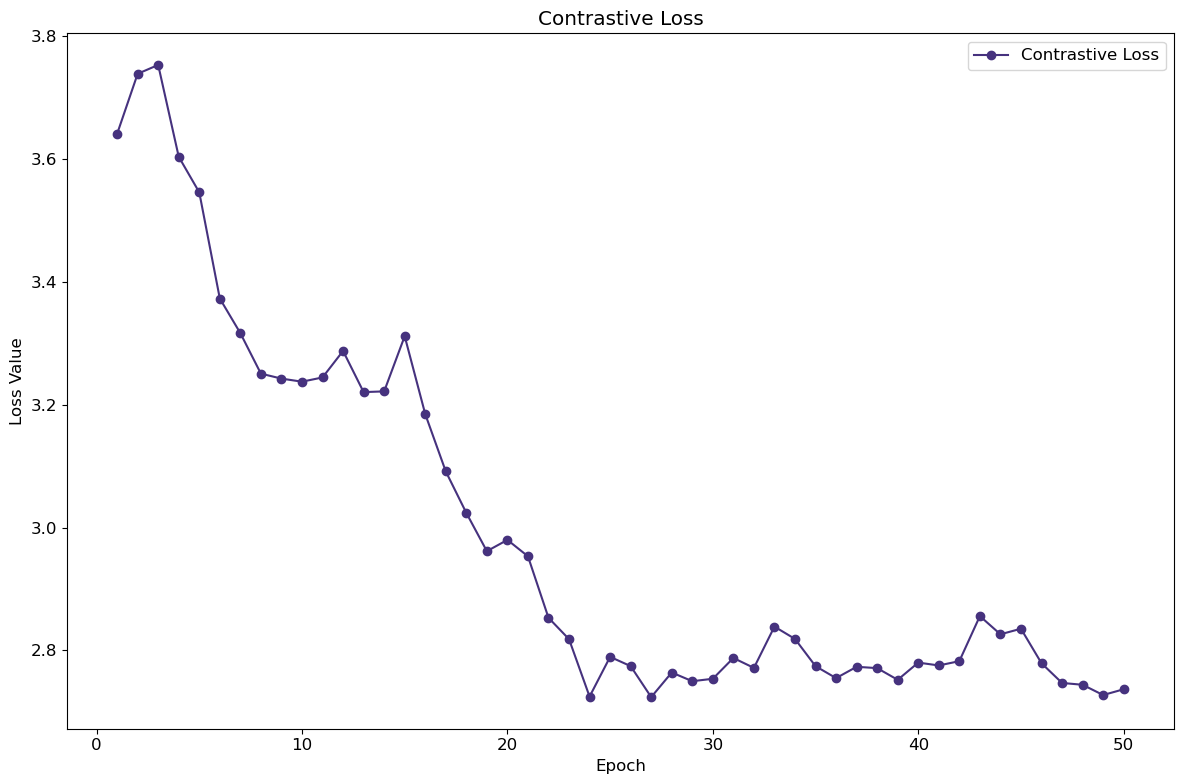

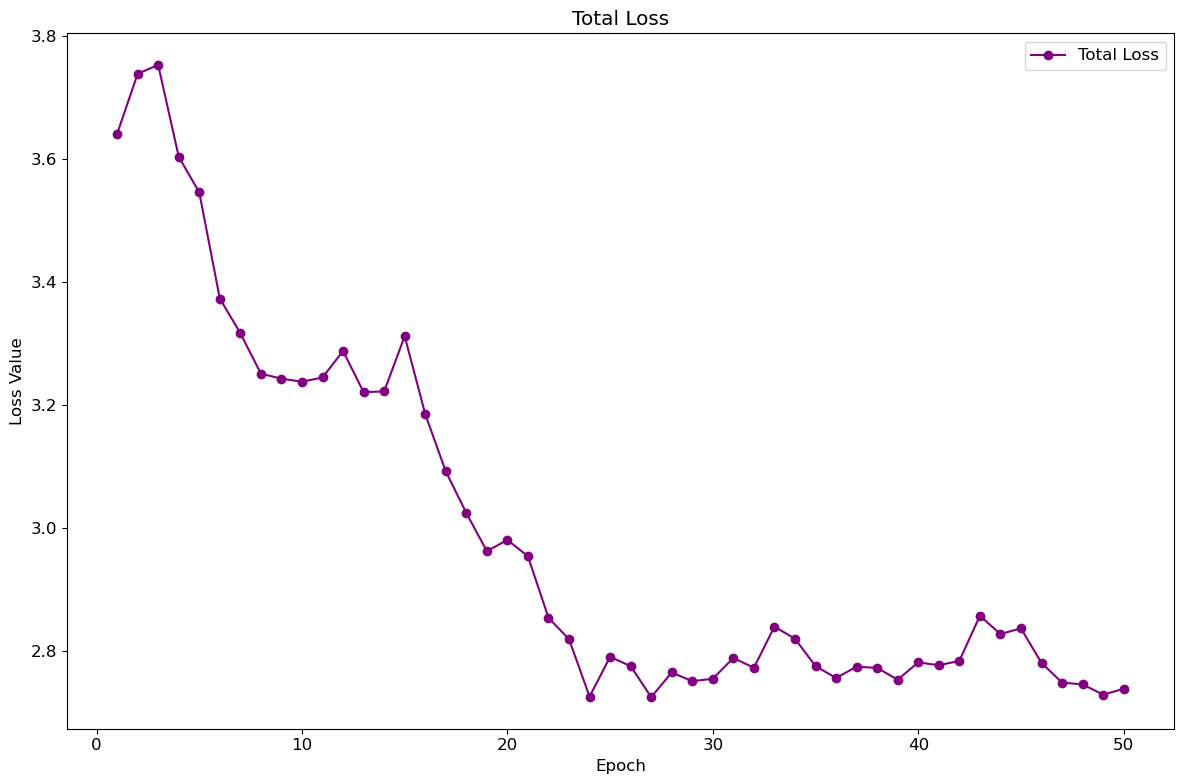

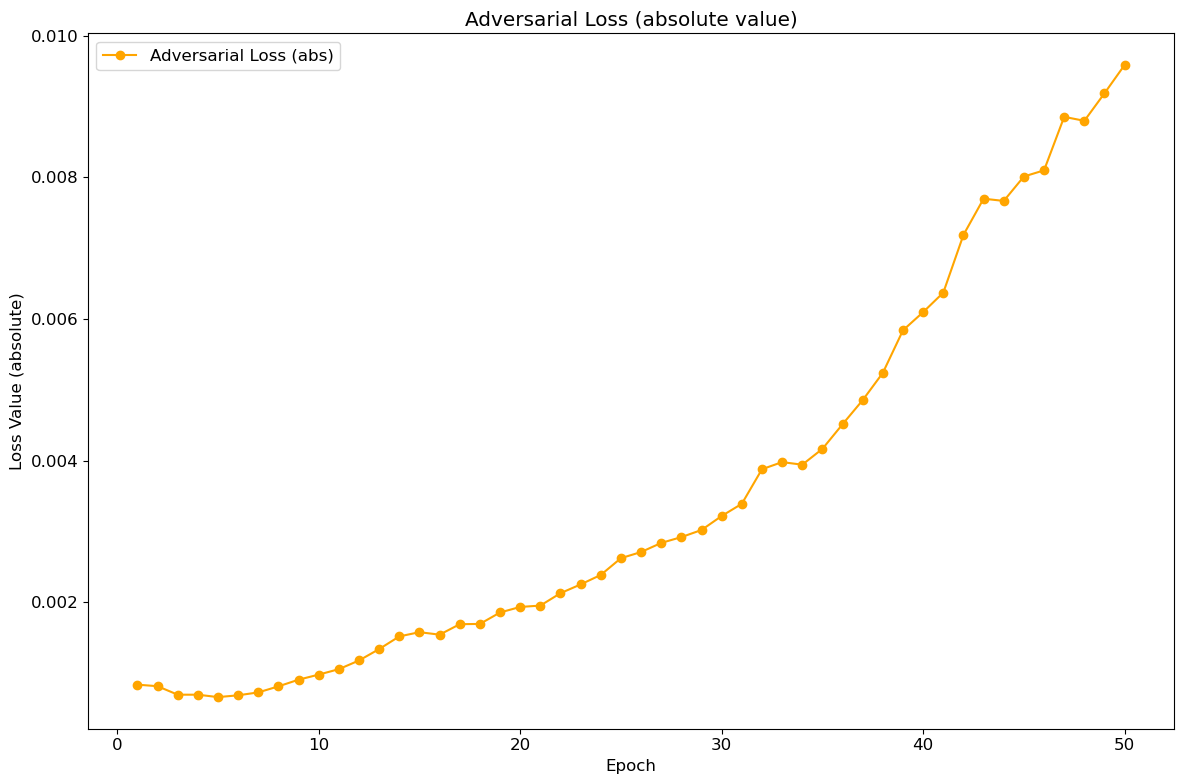

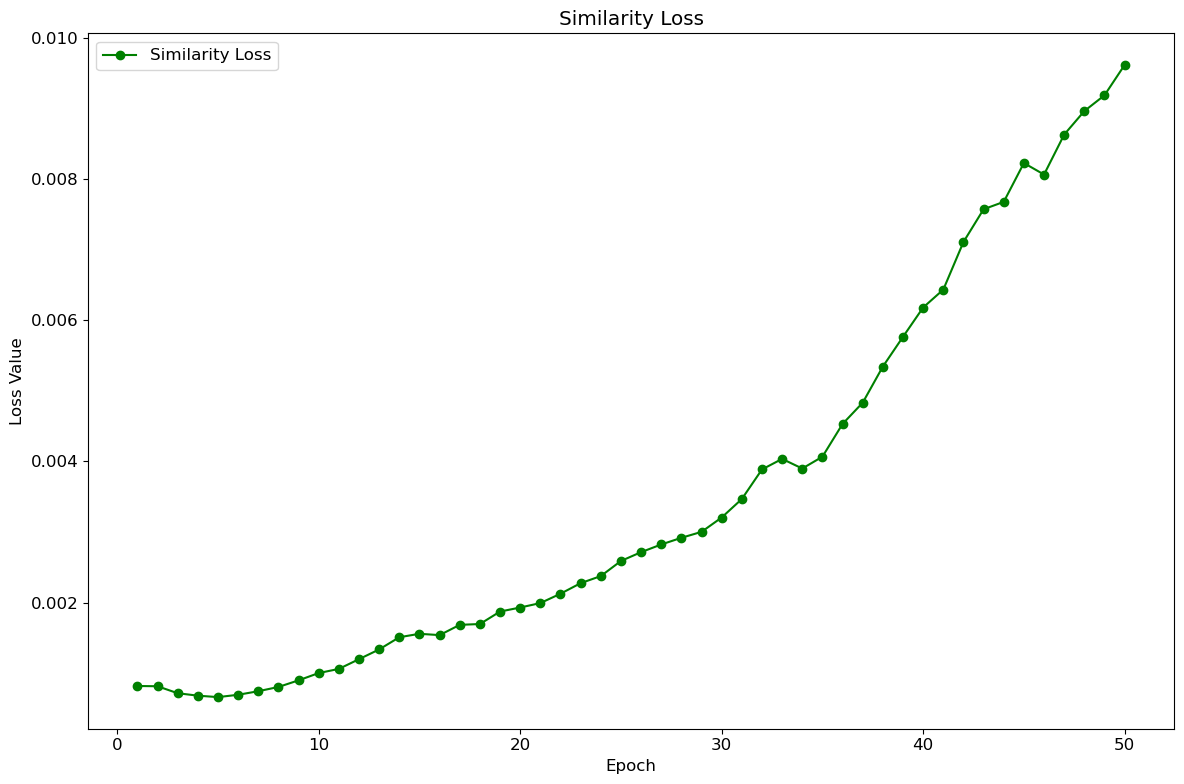

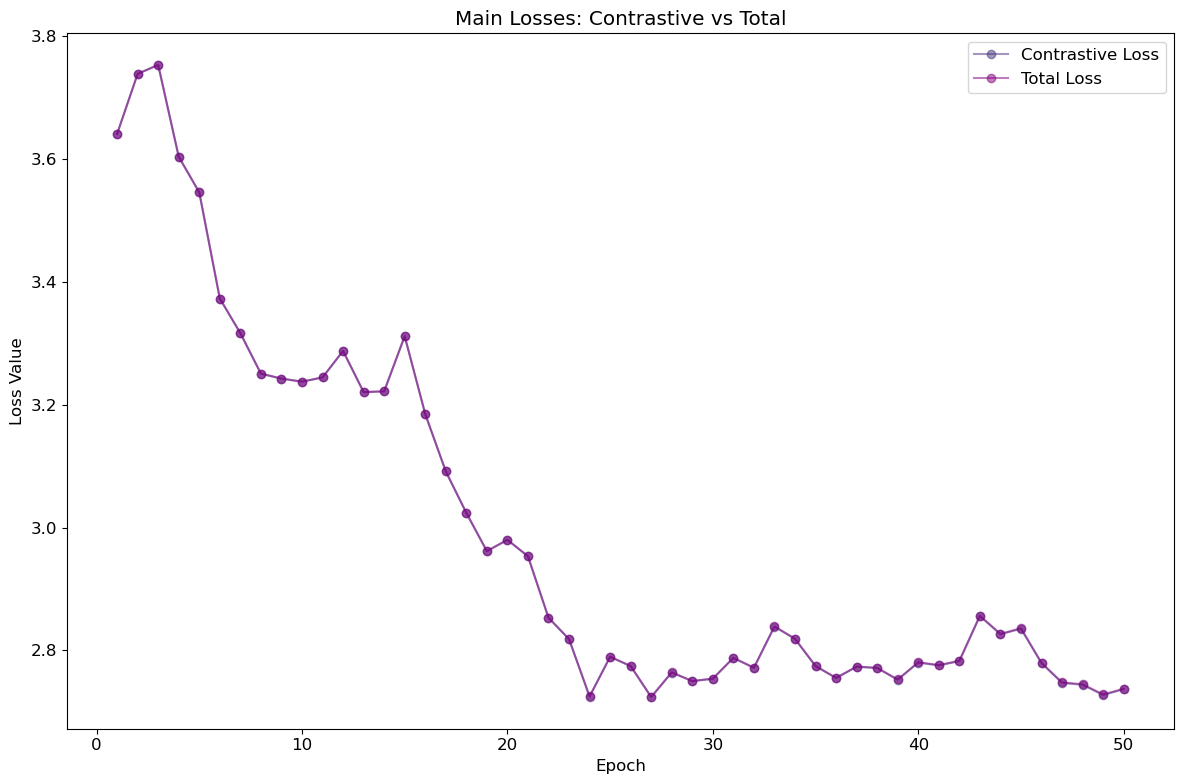

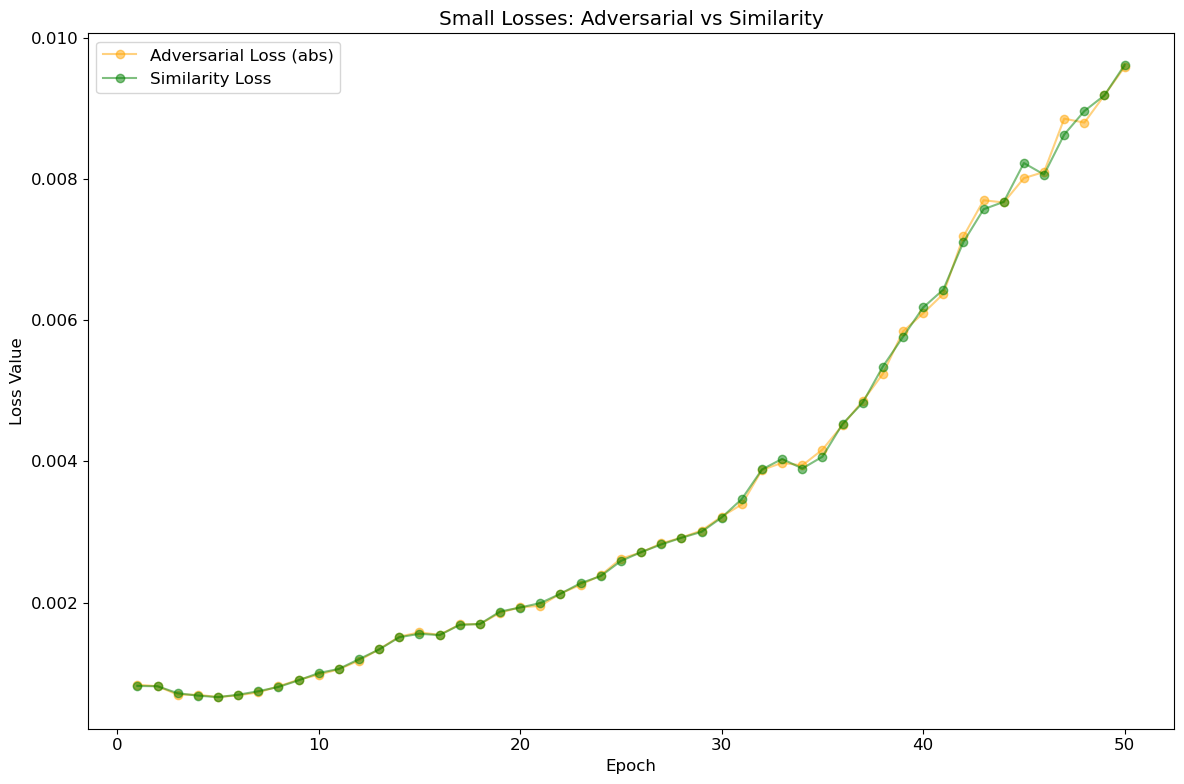


Trend Analysis:

Contrastive Loss:
  Slope: -0.017846 per epoch
  R-squared: 0.7462
  p-value: 0.000000

Adversarial Loss:
  Slope: -0.000177 per epoch
  R-squared: 0.8953
  p-value: 0.000000

Similarity Loss:
  Slope: 0.000178 per epoch
  R-squared: 0.8953
  p-value: 0.000000

Total Loss:
  Slope: -0.017828 per epoch
  R-squared: 0.7456
  p-value: 0.000000


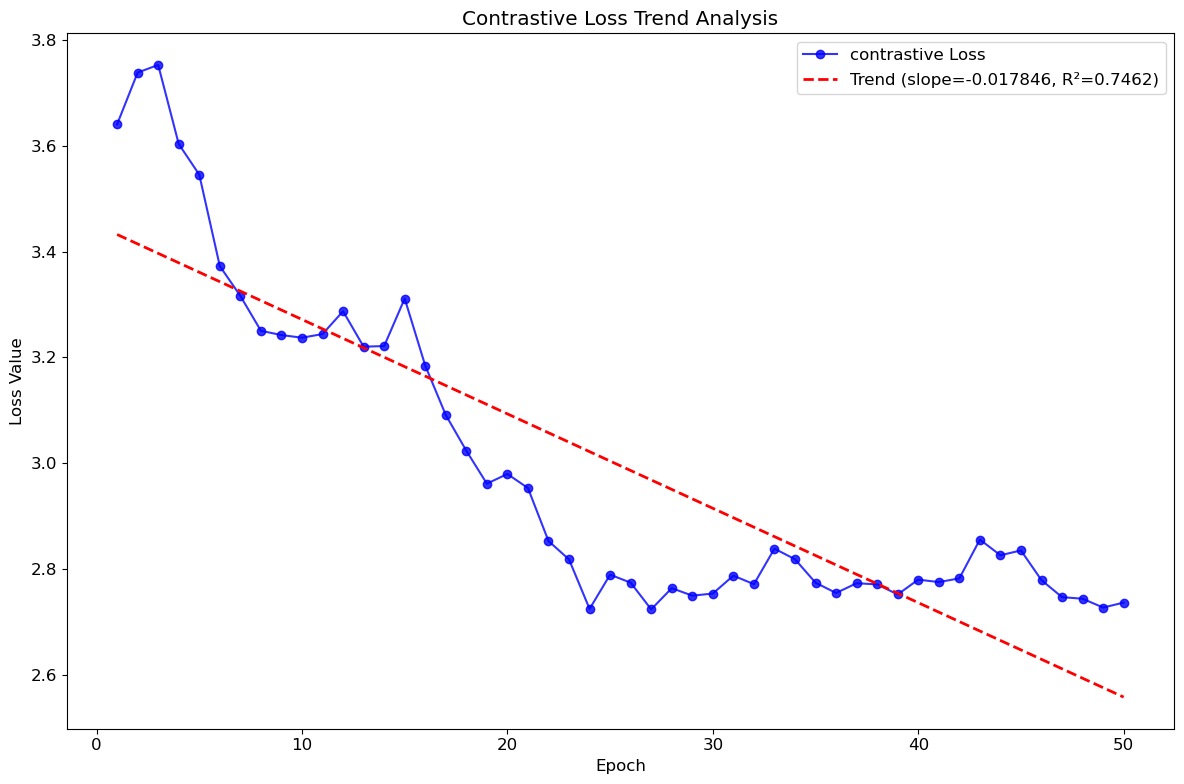

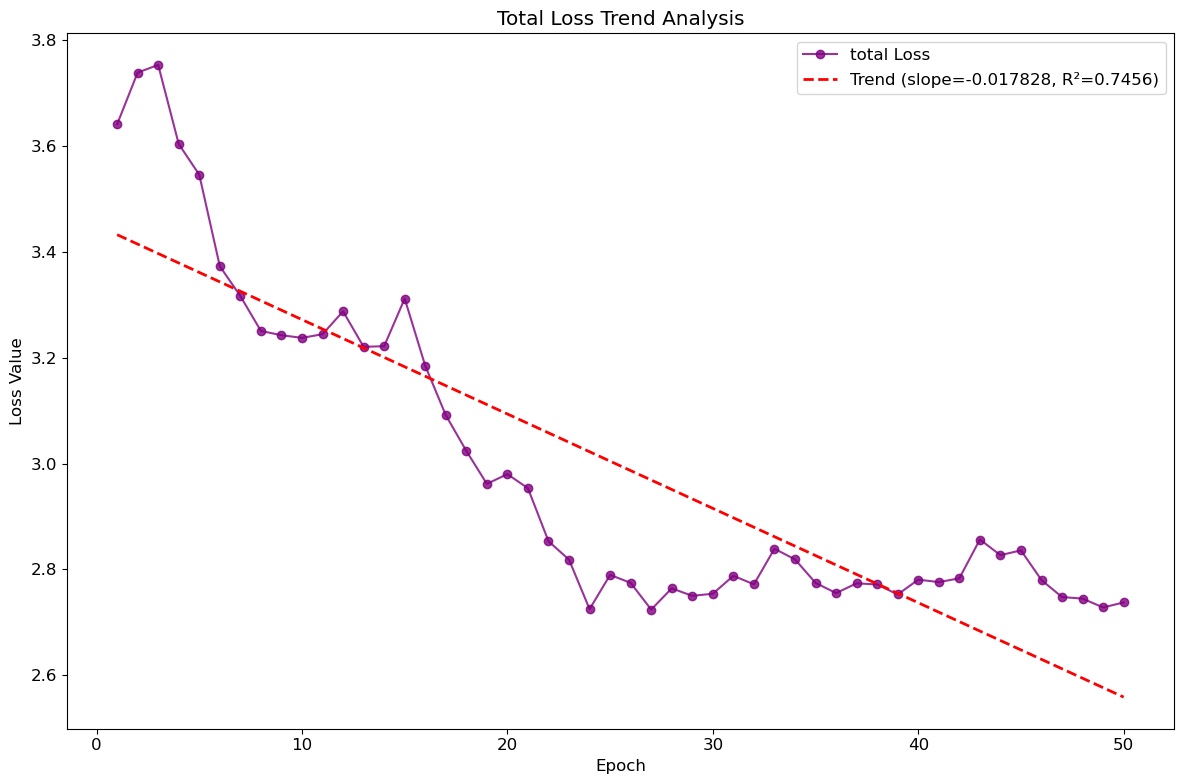

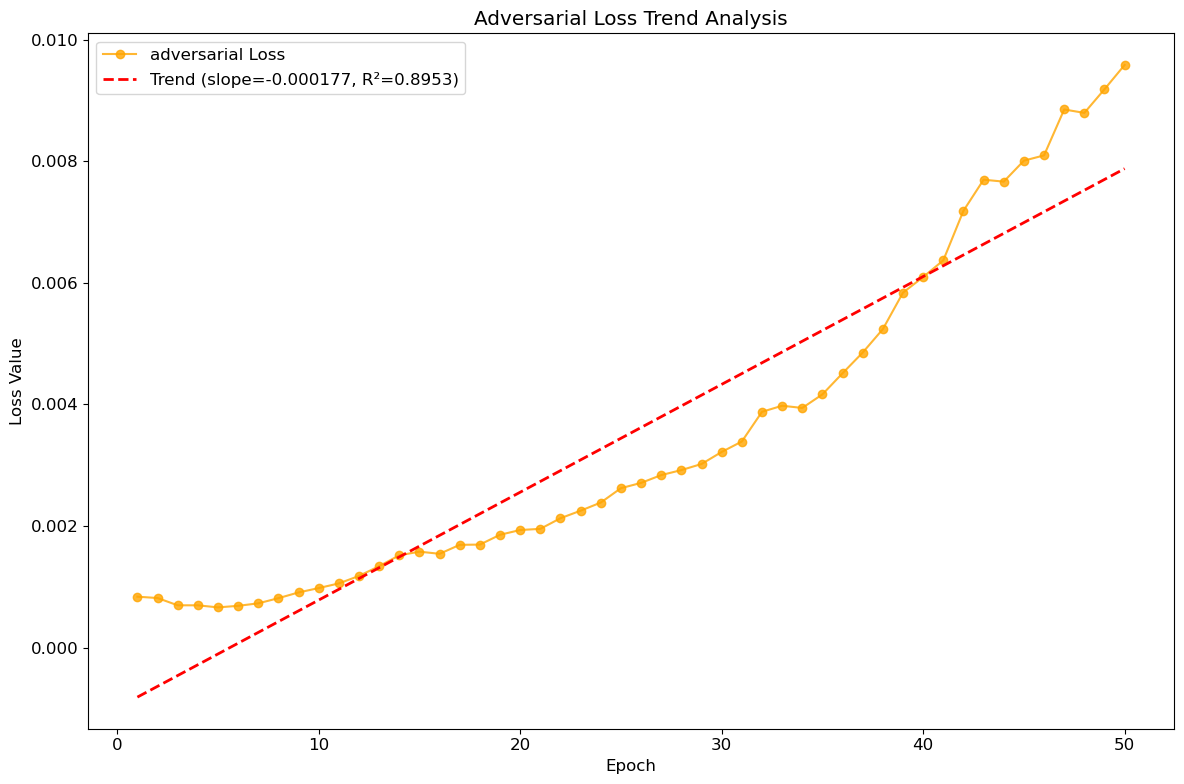

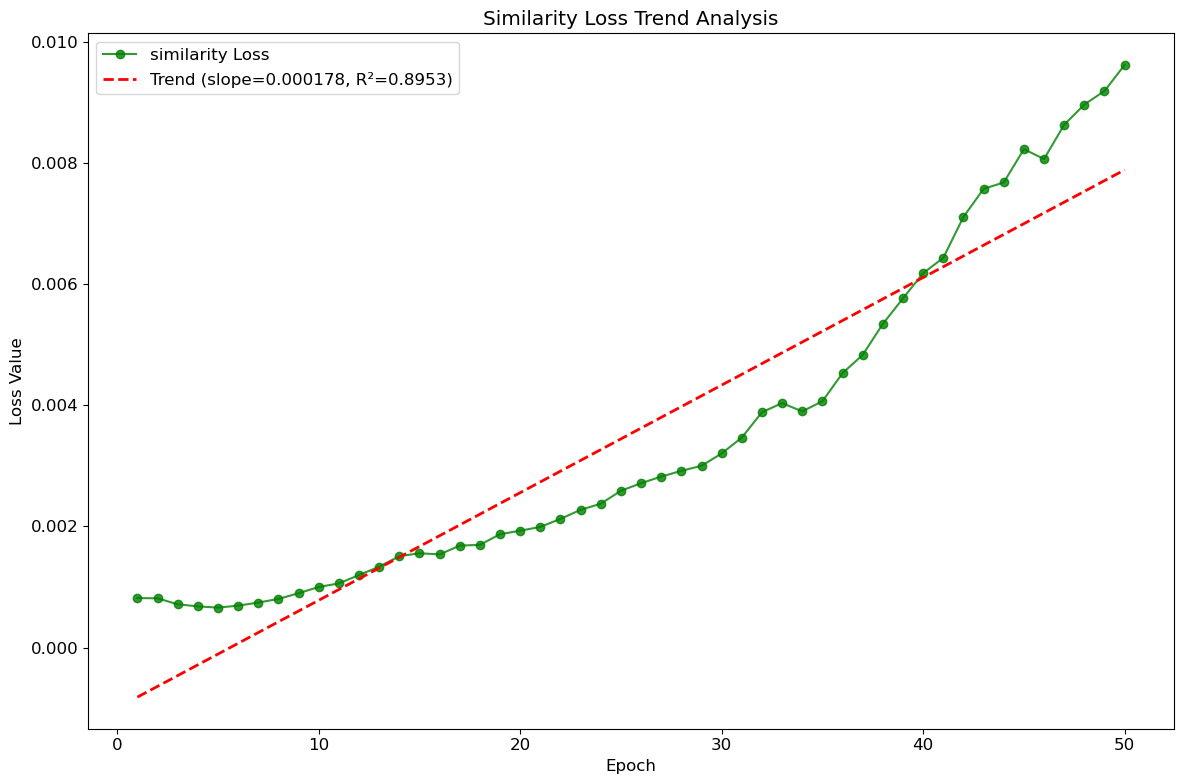


Summary of Training:
Training duration: 50 epochs
Final contrastive loss: 2.7367
Final total loss: 2.7376
Final adversarial loss: -0.009587
Final similarity loss: 0.009615

Growth rates (first 5 epochs vs last 5 epochs):
  Contrastive loss: -24.87%
  Total loss: -24.85%
  Adversarial loss: 1102.66%
  Similarity loss: 1104.34%


In [1]:
# VideoMoCo Loss Visualization Notebook - Modified for Separate Plots

# Import necessary libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set up plotting style
plt.style.use('default')  # Use default style instead of seaborn
sns.set_palette("viridis")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = False  # Explicitly disable grid

# Function to extract loss values from log text
def extract_losses(log_text):
    pattern = r"Epoch (\d+), Losses: {'contrastive': ([\d\.\-e]+), 'adversarial': ([\d\.\-e]+), 'similarity': ([\d\.\-e]+), 'total': ([\d\.\-e]+)}"
    matches = re.findall(pattern, log_text)
    
    data = []
    for match in matches:
        epoch = int(match[0])
        contrastive = float(match[1])
        adversarial = float(match[2])
        similarity = float(match[3])
        total = float(match[4])
        data.append([epoch, contrastive, adversarial, similarity, total])
    
    return pd.DataFrame(data, columns=['epoch', 'contrastive', 'adversarial', 'similarity', 'total'])

# Read the log text from a file
# Replace this with the path to your log file
log_file_path = 'D:\\PhD\\Chapter3.1_GAN_Explainbility\\GAN_CL_XAI\\GitHub2\\Loss_Logs_v1.txt'

try:
    with open(log_file_path, 'r') as f:
        log_text = f.read()
except FileNotFoundError:
    # If file not found, use some example data for demonstration
    log_text = """
    Train Epoch 1/50: 100% 2/2 [00:00<00:00,  2.87it/s]
    Epoch 1, Losses: {'contrastive': 5.60529899597168, 'adversarial': -0.0003780678962357342, 'similarity': 0.00036182587791699916, 'total': 5.605334997177124}
    Train Epoch 2/50: 100% 2/2 [00:00<00:00,  2.75it/s]
    Epoch 2, Losses: {'contrastive': 5.601036787033081, 'adversarial': -0.000496499880682677, 'similarity': 0.0003700221859617159, 'total': 5.601073741912842}
    """
    print("Log file not found. Using example data for demonstration.")

# Extract the loss data
df = extract_losses(log_text)

# Display basic information
print(f"Extracted loss data for {len(df)} epochs")
print("\nFirst few rows:")
print(df.head())

print("\nBasic statistics:")
print(df.describe())

# Calculate moving averages for smoothing
window_size = 5  # 5-epoch window
df['contrastive_ma'] = df['contrastive'].rolling(window=window_size, min_periods=1).mean()
df['adversarial_ma'] = df['adversarial'].rolling(window=window_size, min_periods=1).mean()
df['similarity_ma'] = df['similarity'].rolling(window=window_size, min_periods=1).mean()
df['total_ma'] = df['total'].rolling(window=window_size, min_periods=1).mean()

# MODIFIED: Create individual plots for each loss component instead of a collage

# 1. Contrastive Loss Plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['contrastive'], 'o-', label='Contrastive Loss')
# Removed moving average line
plt.title('Contrastive Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('contrastive_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Total Loss Plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['total'], 'o-', color='purple', label='Total Loss')
# Removed moving average line
plt.title('Total Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('total_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Adversarial Loss Plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], -df['adversarial'], 'o-', color='orange', label='Adversarial Loss (abs)')
# Removed moving average line
plt.title('Adversarial Loss (absolute value)')
plt.xlabel('Epoch')
plt.ylabel('Loss Value (absolute)')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('adversarial_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Similarity Loss Plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['similarity'], 'o-', color='green', label='Similarity Loss')
# Removed moving average line
plt.title('Similarity Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('similarity_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Main Losses (Contrastive and Total) as a single plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], df['contrastive'], 'o-', alpha=0.5, label='Contrastive Loss')
# Removed moving average line
plt.plot(df['epoch'], df['total'], 'o-', alpha=0.5, color='purple', label='Total Loss')
# Removed moving average line
plt.title('Main Losses: Contrastive vs Total')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('main_losses_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Small Losses (Adversarial and Similarity) as a single plot
plt.figure(figsize=(12, 8))
plt.plot(df['epoch'], -df['adversarial'], 'o-', alpha=0.5, color='orange', label='Adversarial Loss (abs)')
# Removed moving average line
plt.plot(df['epoch'], df['similarity'], 'o-', alpha=0.5, color='green', label='Similarity Loss')
# Removed moving average line
plt.title('Small Losses: Adversarial vs Similarity')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# Removed grid
plt.legend()
plt.tight_layout()
plt.savefig('small_losses_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical Analysis: Calculate trend lines
trend_analysis = {}
for column in ['contrastive', 'adversarial', 'similarity', 'total']:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['epoch'], df[column])
    trend_analysis[column] = {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2,
        'p_value': p_value
    }

# Print the statistical analysis
print("\nTrend Analysis:")
for loss_type, metrics in trend_analysis.items():
    print(f"\n{loss_type.capitalize()} Loss:")
    print(f"  Slope: {metrics['slope']:.6f} per epoch")
    print(f"  R-squared: {metrics['r_squared']:.4f}")
    print(f"  p-value: {metrics['p_value']:.6f}")

# Individual trend line plots for each loss type
for column, color in zip(['contrastive', 'total', 'adversarial', 'similarity'], 
                         ['blue', 'purple', 'orange', 'green']):
    metrics = trend_analysis[column]
    
    plt.figure(figsize=(12, 8))
    # Plot actual data
    y_data = -df[column] if column == 'adversarial' else df[column]
    plt.plot(df['epoch'], y_data, 'o-', color=color, alpha=0.8, label=f'{column} Loss')
    
    # Removed moving average
    
    # Plot trend line
    x_line = np.array([df['epoch'].min(), df['epoch'].max()])
    y_line = metrics['slope'] * x_line + metrics['intercept']
    if column == 'adversarial':
        y_line = -y_line
    plt.plot(x_line, y_line, '--', color='red', linewidth=2, 
             label=f'Trend (slope={metrics["slope"]:.6f}, R²={metrics["r_squared"]:.4f})')

    plt.title(f'{column.capitalize()} Loss Trend Analysis')
    plt.xlabel('Epoch')
    plt.ylabel('Loss Value')
    plt.legend()
    # Removed grid
    plt.tight_layout()
    plt.savefig(f'{column}_trend.png', dpi=300, bbox_inches='tight')
    plt.show()

# Summary
print("\nSummary of Training:")
print(f"Training duration: {len(df)} epochs")
print(f"Final contrastive loss: {df['contrastive'].iloc[-1]:.4f}")
print(f"Final total loss: {df['total'].iloc[-1]:.4f}")
print(f"Final adversarial loss: {df['adversarial'].iloc[-1]:.6f}")
print(f"Final similarity loss: {df['similarity'].iloc[-1]:.6f}")

# Growth rate (comparing last 5 epochs to first 5)
first_5_avg = df.iloc[:5][['contrastive', 'total', 'adversarial', 'similarity']].mean()
last_5_avg = df.iloc[-5:][['contrastive', 'total', 'adversarial', 'similarity']].mean()
growth = (last_5_avg - first_5_avg) / first_5_avg * 100

print("\nGrowth rates (first 5 epochs vs last 5 epochs):")
for loss_type, rate in growth.items():
    print(f"  {loss_type.capitalize()} loss: {rate:.2f}%")